### Student Information
Name: 施泳瑜(SHIH, YUNG-YU)

Student ID:107071016

GitHub ID: la83la

Kaggle name: sally shih

Kaggle private scoreboard snapshot: 

![title](kaggle.png)

---

# First

This part is worth 30% of your grade. Do the take home exercises in the DM2021-Lab2-master Repo. You may need to copy some cells from the Lab notebook to this notebook.

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [9]:
import re
from nltk.corpus import stopwords
from collections import Counter

In [10]:
def tokenize(text):
    
    text = text.lower()
    text = re.sub(r'[^\w\s]',' ',text)
    tokens = text.split()
    return tokens

def calculate_frequency(tokens):  
    word_count_dict = Counter()
    for w in tokens:
        word_count_dict[w] += 1        
    return word_count_dict

def print_top_n(counter, n = 10):
    word = []
    frequency = []    
    answer = counter.most_common(n)    
    for i in range(n):
        word.append(answer[i][0])
        frequency.append(answer[i][1])        
    return word, frequency

In [11]:
str = ""
text = str.join(train_df["text"])

str = ""
text2 = str.join(test_df["text"])

In [12]:
#train data
tokens = tokenize(text)
counter = calculate_frequency(tokens)
w, freq = print_top_n(counter, n=30)

#test data
tokens2 = tokenize(text2)
counter2 = calculate_frequency(tokens2)
w2, freq2 = print_top_n(counter2, n=30)

In [13]:
print(list(w))
print(list(freq))
print()
print(list(w2))
print(list(freq2))

['the', 'i', 'to', 'a', 'and', 'of', 'is', 'you', 'it', 'in', 's', 'that', 't', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'but', 'n', 'with', 'just', 'm', 'at', 'can', 'like']
[1689, 1472, 1286, 1181, 942, 792, 786, 775, 681, 617, 565, 526, 508, 503, 445, 385, 380, 368, 343, 312, 310, 295, 289, 289, 288, 281, 277, 262, 248, 239]

['i', 'the', 'to', 'a', 'and', 'of', 'you', 'it', 'is', 'in', 's', 'for', 'that', 't', 'my', 'on', 'be', 'was', 'me', 'so', 'can', 'at', 'have', 'with', 'all', 'are', 'just', 'but', 'get', 'your']
[151, 147, 138, 110, 91, 83, 80, 78, 76, 69, 61, 56, 54, 53, 50, 43, 40, 34, 33, 32, 32, 30, 30, 29, 29, 28, 26, 26, 26, 24]


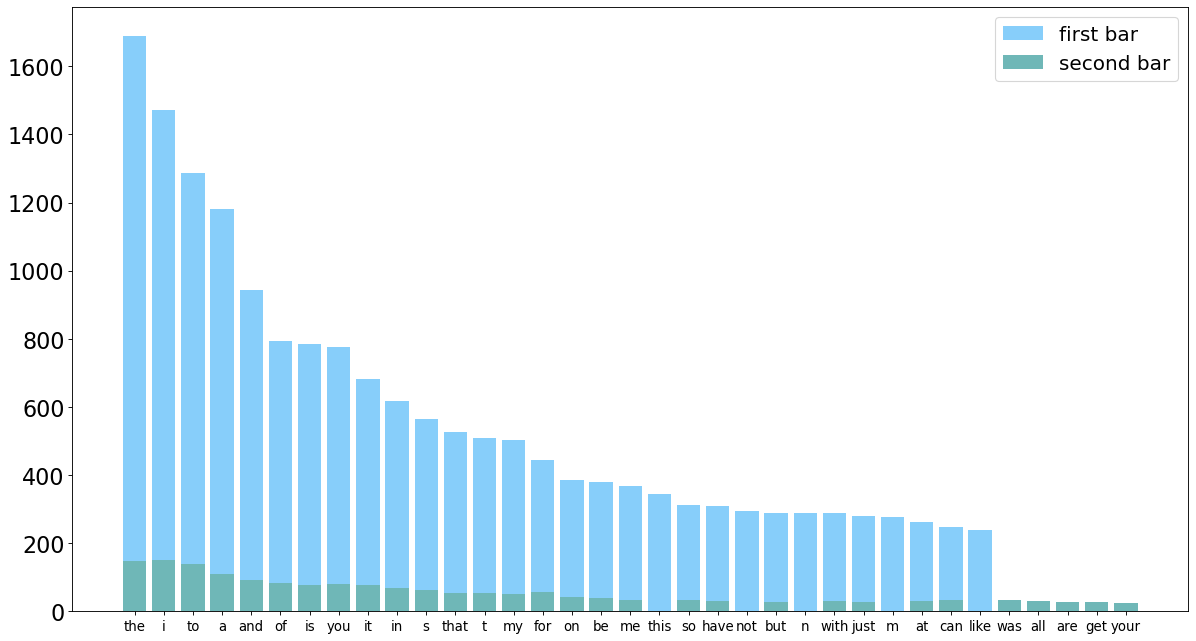

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,10), dpi=80) # set the size that you'd like (width, height)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
width = 0.8
plt.bar(w, freq, width, color = "#87CEFA", label = 'first bar')
plt.bar(w2, freq2, width, color = "#6FB7B7", label = 'second bar')
ax.legend(fontsize = 18)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

    Use TF-IDF to take 1000 features

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

#The number of times a word appears in a document divded by the total number of words in the document.
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

#The log of the number of documents divided by the number of documents that contain the word w. 
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf
idfs = computeIDF([numOfWordsA, numOfWordsB])

tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [35]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train_df['text'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00pm,00tiffanyr,01,02,03,0303,034,04,...,zoolander,zumba,óg,деньги,الخفجي,اليوم_الوطني,ध_य,य_ब,सत,アニメ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

    Now, we got the feature names for features [100:110] with TF-IDF!


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

    Before the exercise, using scikit-learn DecisionTreeClassifier performs word frequency and uses these as features to train a model.

In [37]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

    check the results of our model's performance

In [40]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [41]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [42]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


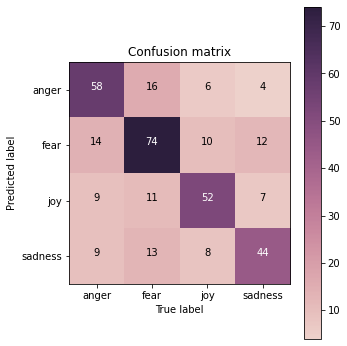

In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

    Answer here:

    This confusion matrix is a summary of prediction results on this classification. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Therefore, calculating a confusion matrix can five us a better idea of what your classification model is getting right and what types of errors it is making.

    Let's take "anger" for example,
    
    (1) For the row, it means “true positive” and “false positive”
    
        - 58 is “true positive” for correctly predicted event values(anger).
        - 16, 6 ,4 are “false positive” for incorrectly predicted event values.
        
    (2) For the others, it means “true negative” and “false negative”
    
        - 14, 9, 9 are “false negative” for correctly predicted no-event values.
        - 74, 11, 13, 10, 52, 8, 12, 7, 44 are “true negative” for correctly predicted no-event values.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [47]:
print(X_train.shape)
print(y_train.shape)

(3613, 500)
(3613,)


    Using Navie Bayes model to train..., instead of DecisionTreeClassifier 

In [48]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
NB_model = naive_bayes_classifier.fit(X_train, y_train)

In [49]:
NB_y_train_pred = NB_model.predict(X_train)
NB_y_test_pred = NB_model.predict(X_test)

In [50]:
NB_acc_train = accuracy_score(y_true=y_train, y_pred=NB_y_train_pred)
NB_acc_test = accuracy_score(y_true=y_test, y_pred=NB_y_test_pred)

print('training accuracy: {}'.format(round(NB_acc_train, 2)))
print('testing accuracy: {}'.format(round(NB_acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [51]:
print(classification_report(y_true=y_test, y_pred=NB_y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [52]:
cm = confusion_matrix(y_true=y_test, y_pred=NB_y_test_pred) 
print(cm)

[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


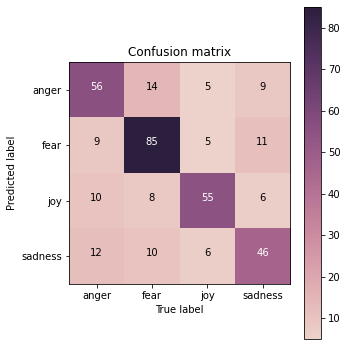

In [53]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

    The above is my testing results.
    Checking the results by  confusion matrix, again!

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

    Let me interpret these differences! 

    the result of the Decision Tree model 

                     precision    recall  f1-score   support

           anger       0.67      0.70      0.69        84
            fear       0.67      0.65      0.66       110
             joy       0.65      0.65      0.65        79
         sadness       0.66      0.65      0.65        74

        accuracy                           0.66       347
       macro avg       0.66      0.66      0.66       347
    weighted avg       0.66      0.66      0.66       347

    the result of the Naive Bayes

                        precision    recall  f1-score   support

               anger       0.65      0.65      0.65        84
                fear       0.72      0.77      0.75       110
                 joy       0.76      0.70      0.73        79
             sadness       0.63      0.62      0.63        74

            accuracy                           0.69       347
           macro avg       0.69      0.69      0.69       347
        weighted avg       0.70      0.69      0.69       347

    Answer here(Use the theoretical background covered in class):

    Let's discuss Decision tree vs. Naive Bayes classifier. 

    For the decision tree classifier, it is flexible, easy to understand and generate rules. Howerver, it might suffer from "overfitting". And the way classfies by rectangular partitioning, so does not handle correlated features very well. That's way it does not show well result in this example, we still need to prune it.

    For the Naive Bayes classifier, it also easy to implement. But it has one assumption - class conditional independence make the way not pratical(because dependencies exist among variables). Take this for example, "angry","fear", "joy" and "sadness" do have dependencies among these!! Therefore, it cannot be modeled accurately by Naive Bayesian Classifier.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

    (a) Training and Validation Accuracy 

    First, Plot the Training and Validation Accuracy!

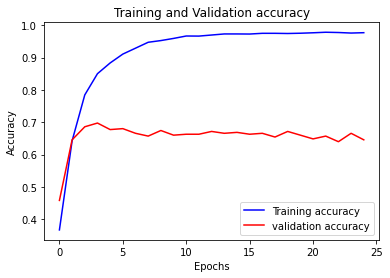

In [65]:
acc_train = training_log['accuracy']
acc_val = training_log['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
training_log.loc[training_log['accuracy'] == max(acc_train)]

,epoch,accuracy,loss,val_accuracy,val_loss
21,21,0.978135,0.066586,0.657061,1.645079


In [67]:
training_log.loc[training_log['val_accuracy'] == max(acc_val)]

,epoch,accuracy,loss,val_accuracy,val_loss
3,3,0.849986,0.420641,0.697406,0.808793


    Then, interpreting the graphs I got!

    The plot clearly shows that increasing the tree depth in the early stages results in a corresponding imporovement in both train and validation sets. This continues until a depth of around 21 levels, after which the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset(i.e. validatioin sets).

    -----------------------------------------
    (b) the Training and Validation Loss 

    First, Plot the Training and Validation Loss!

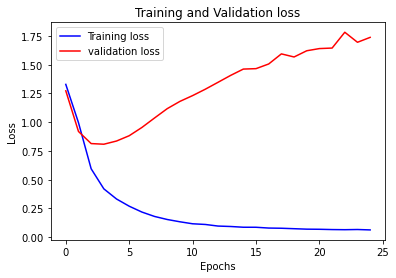

In [71]:
loss_train = training_log['loss']
loss_val = training_log['val_loss']
epochs = range(0,25)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

    Then, interpreting the graphs I got, again!

    Because when the training loss decreases, the validation loss increases.Found that the model is definitely overfitting.(We can see the result shows that training loss << validation loss. As training loss much less than validation loss. It means "overfitting".)

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


    Use "w2v_google_model "

In [78]:
from gensim.models import KeyedVectors

model_path = "C:/Users/user/Desktop/DataMining/lab2/DM2021-Lab2-master-main/Google News Dataset/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

2022-01-07 00:48:12,959 : INFO : loading projection weights from C:/Users/user/Desktop/DataMining/lab2/DM2021-Lab2-master-main/Google News Dataset/GoogleNews-vectors-negative300.bin
2022-01-07 00:48:52,333 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:/Users/user/Desktop/DataMining/lab2/DM2021-Lab2-master-main/Google News Dataset/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-01-07T00:48:52.319447', 'gensim': '4.1.2', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949078559875),
 ('excited', 0.6247666478157043)]

    Use "glove"

In [79]:
import gensim.downloader as api
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

2022-01-07 00:50:33,059 : INFO : loading projection weights from C:\Users\user/gensim-data\glove-twitter-25\glove-twitter-25.gz
2022-01-07 00:51:17,575 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (1193514, 25) matrix of type float32 from C:\\Users\\user/gensim-data\\glove-twitter-25\\glove-twitter-25.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-01-07T00:51:17.574423', 'gensim': '4.1.2', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}


load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323722839355),
 ('wish', 0.9013165235519409)]

In [80]:
 "This is some text I am processing with Spacy".split(' ')

['This', 'is', 'some', 'text', 'I', 'am', 'processing', 'with', 'Spacy']

In [81]:
vectors = [w2v_google_model[x] for x in "This is some text I am processing with Spacy".split(' ')]
vectors

[array([-0.2890625 ,  0.19921875,  0.16015625,  0.02526855, -0.23632812,
         0.10205078,  0.06640625, -0.16503906,  0.12597656,  0.22070312,
         0.05517578, -0.28710938, -0.02148438,  0.05541992,  0.01574707,
         0.29296875,  0.19433594, -0.01531982,  0.03955078, -0.21484375,
         0.00994873,  0.16015625,  0.07958984, -0.05932617,  0.12353516,
        -0.27148438, -0.10205078,  0.078125  , -0.07519531,  0.22363281,
         0.16210938, -0.04614258,  0.12304688,  0.07275391,  0.25      ,
         0.0072937 , -0.38867188,  0.10644531,  0.20996094,  0.06103516,
         0.10107422,  0.16894531, -0.15429688, -0.08251953,  0.06542969,
        -0.12255859, -0.11621094,  0.04248047,  0.08251953,  0.09716797,
        -0.05371094,  0.125     ,  0.15039062, -0.09228516,  0.23925781,
         0.15234375,  0.1796875 , -0.26171875,  0.15429688,  0.09619141,
        -0.30859375, -0.05224609, -0.18652344, -0.24414062, -0.0612793 ,
        -0.12695312,  0.14160156, -0.03295898,  0.0

    Now, we can use these "words" to represent sentence data and train our model!

In [82]:
import re
import numpy
from nltk.corpus import stopwords
EngStopWords = set(stopwords.words('english'))
from tensorflow.keras.preprocessing.text import Tokenizer

    First, preprocessing :)

In [83]:
def preprocess(text): 
    text = re.sub(r'[^\w\s]',' ',text)
    
    tokens = []
    for word in text.split():
        if word in EngStopWords:
            pass #如果詞彙是個英文的停用詞的話，就略過不處理。
        else:
            tokens.append(word)
    return tokens

In [84]:
# make every "text" to "tokens"
sent_tokens = [preprocess(sent) for sent in train_df['text']]

# number tokens!
tok = Tokenizer(lower=False)
tok.fit_on_texts(sent_tokens)
data_encoded_phrase = tok.texts_to_sequences(sent_tokens)

# padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_ngram = 25
data = pad_sequences(data_encoded_phrase, maxlen=max_ngram, padding='pre')
print(data[:5])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  705  155  270 1318 4939 4940 1697]
 [   0    0    0    0    0    0    0    0    0 4941  706 4942 4943 1698
  1699 1698 2402 1698  136 4944 4945 4946 1700 4947 4948]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0  117
   128 4949   94  923 4950   94 1099 4951 2403 4952 4953]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 4954  180 2404 4955   80   42  129]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 4956  141 2405 4957  195]]


In [85]:
# embedding
embedding_dim = 300
size_of_vocabulary=len(tok.word_index) + 1
embedding_matrix = numpy.zeros((size_of_vocabulary, embedding_dim))
for word, i in tok.word_index.items():
    if word in w2v_google_model:
        embedding_vector = w2v_google_model[word]
        embedding_matrix[i] = embedding_vector

print(len(embedding_matrix))
embedding_matrix

11157


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07910156, -0.0050354 ,  0.11181641, ..., -0.0067749 ,
         0.04272461, -0.10351562],
       [-0.01397705, -0.02722168, -0.05493164, ..., -0.03979492,
        -0.25195312, -0.01037598],
       ...,
       [ 0.10498047, -0.08837891,  0.06933594, ...,  0.02368164,
        -0.07421875,  0.19921875],
       [ 0.35351562,  0.00823975,  0.05224609, ...,  0.06298828,
         0.06201172,  0.22265625],
       [-0.12988281, -0.3359375 , -0.4609375 , ..., -0.01483154,
         0.21777344, -0.01977539]])

In [87]:
def to_embedding(tokens):
    embedding_dim = 300
    
    size_of_vocabulary=len(tokens) + 1
    embedding_matrix = numpy.zeros((size_of_vocabulary, embedding_dim))
    
    i = 0
    for word in tokens:
        if word in w2v_google_model:
            embedding_matrix[i] = w2v_google_model[word]
            i = i+1
    embedding_matrix = embedding_matrix[embedding_matrix.sum(axis=1)!=0,:]

    return embedding_matrix

embeddings = [to_embedding(tokens) for tokens in sent_tokens]
print(len(embedding_matrix))

11157


    Print out the first sentence for the TA 👍

In [88]:
embeddings[0]

array([[-0.06640625, -0.02404785,  0.05444336, ..., -0.13964844,
         0.06103516, -0.296875  ],
       [ 0.12988281,  0.25976562,  0.27148438, ...,  0.03613281,
         0.08496094,  0.1171875 ],
       [ 0.24316406, -0.07714844, -0.10302734, ..., -0.08300781,
         0.06542969, -0.02941895],
       ...,
       [ 0.02990723, -0.15722656, -0.03637695, ...,  0.1328125 ,
         0.1328125 , -0.28125   ],
       [ 0.01647949, -0.11816406, -0.02282715, ...,  0.20898438,
        -0.16503906, -0.11767578],
       [ 0.07763672,  0.28515625,  0.03588867, ..., -0.21191406,
         0.24414062,  0.07373047]])

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

    Use "w2v_google_model "

In [97]:
word_list = ['angry', 'happy', 'sad', 'fear']

#印出前五個和這四個相關ㄉ字詞(用w2v)
topn = 15
happy_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]
angry_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('fear', topn=topn)]        
print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['r'] * cn + ['g'] * cn + ['b'] * cn + ['y'] * cn 
print(color)

angry_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream']
happy_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded']
sad_words:  ['sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'remember', 'i', 'know', 'bad', 'thought', 'think', 'but', 'shame']
fear_words:  ['fear', 'anger', 'enemy', 'afraid', 'destroy', 'fears', 'lies', 'faith', 'hatred', 'overcome', 'truth', 'promises', 'enemies', 'minds', 'suffer', 'thoughts']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded', 'sad', 'sw

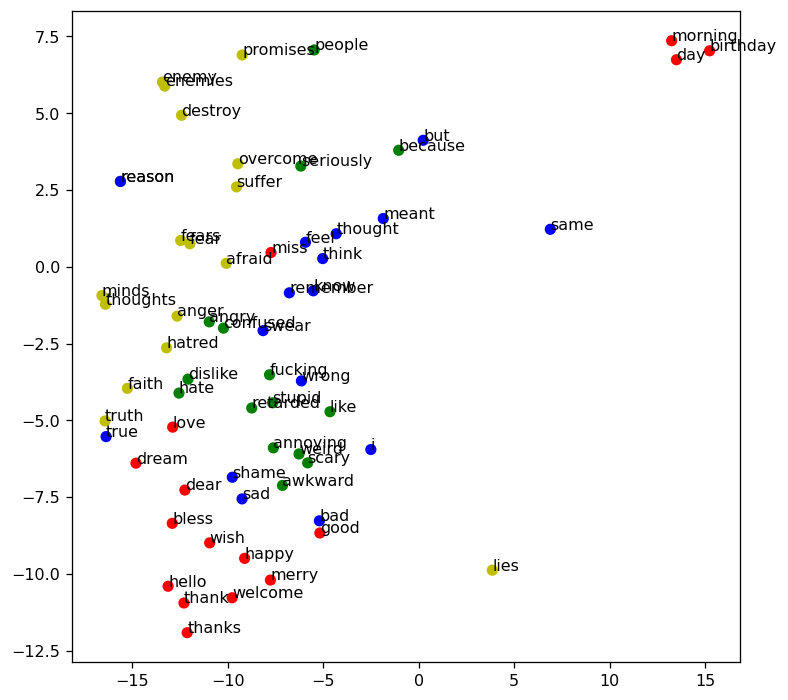

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 80
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')

plt.show()

    【Legend】
    red: mad
    fear: yello
    blue: sad
    green: heppy

    Use "glove"

In [95]:
word_list = ['angry', 'happy', 'sad', 'fear']

#印出前五個和這四個相關ㄉ字詞(用w2v)
topn = 15
happy_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]
angry_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('fear', topn=topn)]        
print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['r'] * cn + ['g'] * cn + ['b'] * cn + ['y'] * cn 
print(color)

angry_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream']
happy_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded']
sad_words:  ['sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'remember', 'i', 'know', 'bad', 'thought', 'think', 'but', 'shame']
fear_words:  ['fear', 'anger', 'enemy', 'afraid', 'destroy', 'fears', 'lies', 'faith', 'hatred', 'overcome', 'truth', 'promises', 'enemies', 'minds', 'suffer', 'thoughts']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'dream', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'retarded', 'sad', 'sw

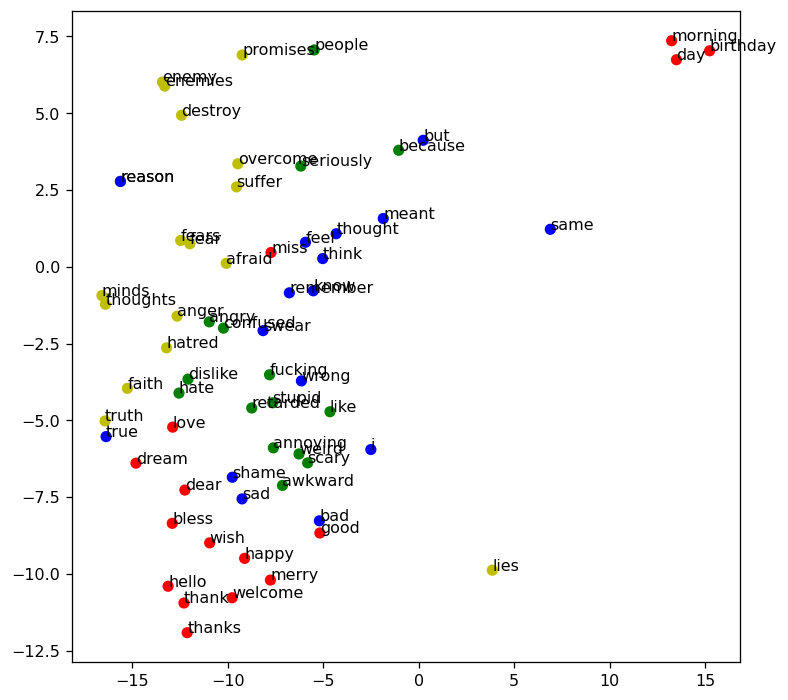

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 80
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')

plt.show()

    【Legend】
    red: mad
    fear: yello
    blue: sad
    green: heppy

# Second
This part is worth 30% of your grade. Participate in the in-class Kaggle Competition regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking.

    see photo above.

# Third
This part is worth 30% of your grade. A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

    see "kaggle_competition.ipynb"
    see "kaggle_RoBERTa.ipynb"

# Fourth 
This part is worth 10% of your grade. It's hard for us to follow if your code is messy :'(, so please tidy up your notebook and add minimal comments where needed.

    Hard work at the end of thie class.
    Thank TAs all this semester!! 🥰